# Investigate a Dataset
## Udacity Data Analyst Nanodegree - Project 2

### Overview
The following code analyzes the **Titanic** dataset

### Questions
tbd

### Environment setup

In [12]:
# load required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# display plots inside the notebook
%matplotlib inline

### Data ingestion

In [2]:
# load dataset from local file system
titanic = pd.read_csv("titanic_data.csv")

### Data exploration

In [3]:
# show first 5 rows of dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# show last 5 rows of dataset
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# calculate summary statistics
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


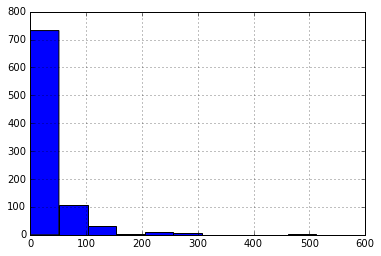

In [18]:
# plot data
titanic["Fare"].hist()

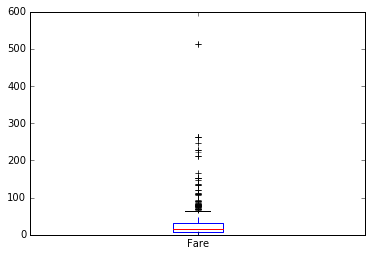

In [42]:
titanic["Fare"].plot(kind="box")

In [35]:
titanic_by_sex = titanic.groupby("Sex")

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

In [36]:
titanic_by_sex["Fare"].mean()

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

In [33]:
titanic_by_sex["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

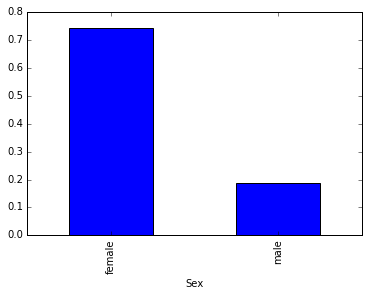

In [34]:
titanic_by_sex["Survived"].mean().plot(kind="bar")

In [37]:
titanic_by_sex_and_class = titanic.groupby(["Sex", "Pclass"])

In [40]:
titanic_by_sex_and_class[["Age", "Fare"]].describe()

Age        Fare
Sex    Pclass                              
female 1      count   85.000000   94.000000
              mean    34.611765  106.125798
              std     13.612052   74.259988
              min      2.000000   25.929200
              25%     23.000000   57.244800
              50%     35.000000   82.664550
              75%     44.000000  134.500000
              max     63.000000  512.329200
       2      count   74.000000   76.000000
              mean    28.722973   21.970121
              std     12.872702   10.891796
              min      2.000000   10.500000
              25%     22.250000   13.000000
              50%     28.000000   22.000000
              75%     36.000000   26.062500
              max     57.000000   65.000000
       3      count  102.000000  144.000000
              mean    21.750000   16.118810
              std     12.729964   11.690314
              min      0.750000    6.750000
              25%     14.125000    7.854200
              50%     21.500000   12.475000
              75%     29.750000   20.221875
              max     63.000000   69.550000
male   1      count  101.000000  122.000000
              mean    41.281386   67.226127
              std     15.139570   77.548021
              min      0.920000    0.000000
              25%     30.000000   27.728100
              50%     40.000000   41.262500
              75%     51.000000   78.459375
              max     80.000000  512.329200
       2      count   99.000000  108.000000
              mean    30.740707   19.741782
              std     14.793894   14.922235
              min      0.670000    0.000000
              25%     23.000000   12.331250
              50%     30.000000   13.000000
              75%     36.750000   26.000000
              max     70.000000   73.500000
       3      count  253.000000  347.000000
              mean    26.507589   12.661633
              std     12.159514   11.681696
              min      0.420000    0.000000
              25%     20.000000    7.750000
              50%     25.000000    7.925000
              75%     33.000000   10.008300
              max     74.000000   69.550000

### Data cleaning